In [21]:
#importing libraries and visualisation tools
# Data Manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Statistic descriptives 
from scipy.stats import skew
from scipy.stats import kurtosis

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#Evaluation techniques 
from sklearn.metrics import accuracy_score
from sklearn import metrics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
##reading the dataset Mastercard dataset
ma = pd.read_csv(r"C:\Users\Mr Mathonsi MM\Documents\Honours\Project\Data\MA.csv")


In [23]:
ma

Date        Open        High         Low       Close   Adj Close  \
0     2013-03-01   51.500000   51.951000   51.328999   51.830002   49.233452   
1     2013-03-04   51.598000   52.241001   51.576000   52.140999   49.528854   
2     2013-03-05   52.252998   53.077999   52.185001   52.709999   50.069355   
3     2013-03-06   52.551998   53.123001   52.334999   52.757999   50.114941   
4     2013-03-07   52.771999   53.000000   52.570000   52.667000   50.028507   
5     2013-03-08   53.005001   53.032001   52.445999   52.923000   50.271683   
6     2013-03-11   52.958000   53.247002   52.841000   53.089001   50.429356   
7     2013-03-12   52.987000   53.098999   52.223000   52.316002   49.695091   
8     2013-03-13   52.233002   52.837002   52.112000   52.748001   50.105446   
9     2013-03-14   52.855000   53.125000   52.671001   52.717999   50.076962   
10    2013-03-15   52.598999   52.882999   51.821999   51.937000   49.335079   
11    2013-03-18   51.530998   51.966000   51.473000   51.500999   48.920918   
12    2013-03-19   51.622002   51.784000   50.816002   51.160000   48.597008   
13    2013-03-20   51.599998   51.869999   51.435001   51.862000   49.263836   
14    2013-03-21   51.644001   51.771999   51.321999   51.401001   48.825928   
15    2013-03-22   51.582001   51.877998   51.553001   51.750000   49.157433   
16    2013-03-25   52.025002   52.396000   51.876999   51.999001   49.393974   
17    2013-03-26   52.299999   53.719002   52.222000   53.547001   50.864426   
18    2013-03-27   53.221001   54.073002   53.037998   53.803001   51.107590   
19    2013-03-28   53.840000   54.195999   53.689999   54.112999   51.402065   
20    2013-04-01   54.243999   54.689999   53.599998   53.723000   51.031597   
21    2013-04-02   54.070000   54.398998   53.902000   54.058998   51.350761   
22    2013-04-03   54.084999   54.296001   53.039001   53.325001   50.653553   
23    2013-04-04   53.275002   53.563999   53.014000   53.422001   50.745670   
24    2013-04-05   52.703999   53.240002   52.699001   53.160000   50.553589   
25    2013-04-08   53.069000   53.566002   52.978001   53.437000   50.817005   
26    2013-04-09   53.400002   53.435001   52.314999   52.764000   50.177010   
27    2013-04-10   52.966999   53.798000   52.842999   53.443001   50.822704   
28    2013-04-11   53.442001   54.231998   53.257000   54.124001   51.470303   
29    2013-04-12   53.465000   53.641998   52.960999   53.299000   50.685768   
30    2013-04-15   53.022999   53.384998   52.171001   52.171001   49.613075   
31    2013-04-16   52.311001   53.158001   52.206001   53.158001   50.551678   
32    2013-04-17   52.724998   53.085999   52.467999   52.576000   49.998215   
33    2013-04-18   52.575001   52.647999   52.099998   52.099998   49.545551   
34    2013-04-19   52.283001   52.370998   51.855999   52.195999   49.636848   
35    2013-04-22   52.205002   52.368999   51.879002   52.210999   49.651115   
36    2013-04-23   52.594002   53.118999   52.359001   53.099998   50.496517   
37    2013-04-24   53.196999   53.474998   53.123001   53.202000   50.593525   
38    2013-04-25   53.412998   53.900002   52.514999   53.514000   50.890236   
39    2013-04-26   53.422001   53.816002   53.347000   53.533001   50.908302   
40    2013-04-29   53.748001   53.999001   53.535000   53.901001   51.258259   
41    2013-04-30   53.979000   55.292999   53.957001   55.292999   52.581993   
42    2013-05-01   53.876999   54.485001   53.602001   53.981998   51.335281   
43    2013-05-02   53.599998   54.733002   53.569000   54.553001   51.878288   
44    2013-05-03   55.174000   55.765999   55.063000   55.355000   52.640968   
45    2013-05-06   55.360001   55.676998   54.702999   54.772999   52.087502   
46    2013-05-07   54.807999   55.193001   54.543999   55.125999   52.423195   
47    2013-05-08   55.117001   55.495998   54.827999   55.372002   52.657131   
48    2013-05-09   55.294998   55.617001   54.988998   55.188000   52.482151   
49    2013-0

In [24]:
ma = ma.copy()

In [25]:
# Predictor variables
ma['Open-Close']= ma.Open -ma.Close
ma['High-Low']  = ma.High - ma.Low
ma =ma.dropna()
X= ma[['Open-Close', 'High-Low']]
X.head()

Open-Close  High-Low
0   -0.330002  0.622001
1   -0.542999  0.665001
2   -0.457001  0.892998
3   -0.206001  0.788002
4    0.104999  0.430000

In [26]:
# Target variable
Y= np.where(ma['Adj Close'].shift(-1)>ma['Adj Close'],1,-1)

In [27]:
Y = (Y - min(Y))/(max(Y)- min(Y))

In [28]:
# Splitting the dataset
split_percentage = 0.2
split = int(split_percentage*len(ma))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [29]:
# Instantiate KNN learning model(k=150)
knn = KNeighborsClassifier(n_neighbors=150)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.54
Test_data Accuracy: 0.56


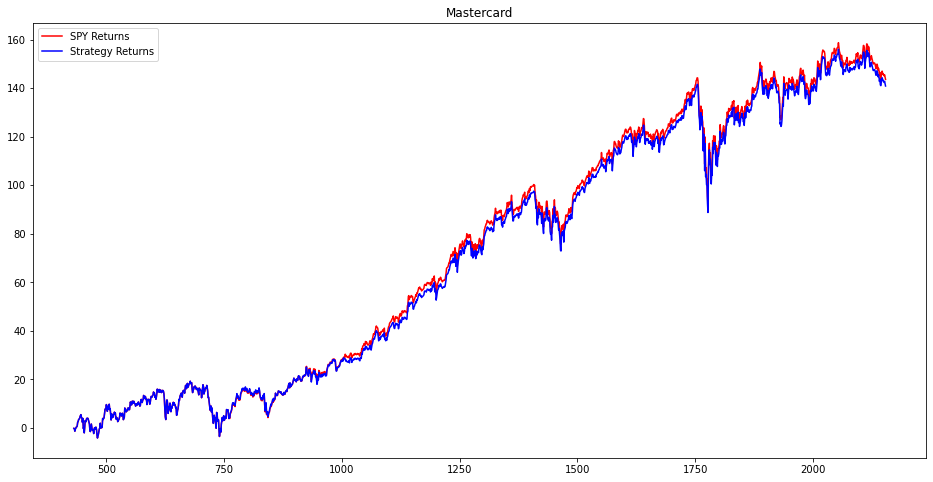

In [30]:
# Predicted Signal
ma['Predicted_Signal'] = knn.predict(X)

# SPY Cumulative Returns
ma['SPY_returns'] = np.log(ma['Adj Close']/ma['Adj Close'].shift(1))
Cumulative_SPY_returns = ma[split:]['SPY_returns'].cumsum()*100

# Cumulative Strategy Returns 
ma['Startegy_returns'] = ma['SPY_returns']* ma['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = ma[split:]['Startegy_returns'].cumsum()*100

# Plot the results to visualize the performance

plt.figure(figsize=(16,8))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='b', label = 'Strategy Returns')
plt.legend()
plt.savefig('knnma.jpg')
plt.title('Mastercard')
plt.show()


In [31]:
# Calculate Sharpe ratio
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: -0.03


In [32]:

import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Features construction 
ma['Open-Close'] = (ma.Open - ma.Close)/ma.Open
ma['High-Low'] = (ma.High - ma.Low)/ma.Low
ma['percent_change'] = ma['Adj Close'].pct_change()
ma['std_5'] = ma['percent_change'].rolling(5).std()
ma['ret_5'] = ma['percent_change'].rolling(5).mean()
ma.dropna(inplace=True)

# X is the input variable
X = ma[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# Y is the target or output variable
y = np.where(ma['Adj Close'].shift(-1) > ma['Adj Close'], 1, -1)

In [34]:
# Total dataset length
dataset_length = ma.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)
split

1612

In [35]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1612, 4) (538, 4)
(1612,) (538,)


In [36]:
clf = RandomForestClassifier(random_state=10)
# Create the model on train dataset
model = clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  52.60223048327137


In [37]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)


              precision    recall  f1-score   support

          -1       0.49      0.34      0.40       251
           1       0.54      0.69      0.61       287

    accuracy                           0.53       538
   macro avg       0.52      0.51      0.50       538
weighted avg       0.52      0.53      0.51       538



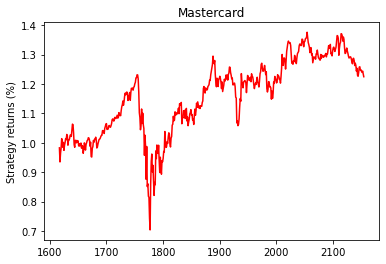

In [38]:
# SPY Cumulative Returns
ma['SPY_returns'] = np.log(ma['Adj Close']/ma['Adj Close'].shift(1))
Cumulative_SPY_returns = ma[split:]['SPY_returns'].cumsum()+1


ma['strategy_returns'] = ma.percent_change.shift(-1) * model.predict(X)
#(ma.strategy_returns[split:]+1).cumprod().plot()
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.ylabel('Strategy returns (%)')
plt.title('Mastercard')
plt.savefig('rfma.jpg')
plt.show()


In [39]:
ma.head()

Date       Open       High        Low      Close  Adj Close   Volume  \
5  2013-03-08  53.005001  53.032001  52.445999  52.923000  50.271683  5068000   
6  2013-03-11  52.958000  53.247002  52.841000  53.089001  50.429356  4091000   
7  2013-03-12  52.987000  53.098999  52.223000  52.316002  49.695091  4798000   
8  2013-03-13  52.233002  52.837002  52.112000  52.748001  50.105446  4715000   
9  2013-03-14  52.855000  53.125000  52.671001  52.717999  50.076962  5567000   

   Open-Close  High-Low  Predicted_Signal  SPY_returns  Startegy_returns  \
5    0.001547  0.011173               1.0          NaN          0.004849   
6   -0.002474  0.007683               1.0     0.003132          0.003132   
7    0.012663  0.016774               1.0    -0.014667         -0.014667   
8   -0.009860  0.013912               1.0     0.008224          0.008224   
9    0.002592  0.008620               1.0    -0.000569         -0.000569   

   percent_change     std_5     ret_5  strategy_returns  
5        0.004861  0.004865  0.004192          0.003136  
6        0.003136  0.004766  0.003619          0.014560  
7       -0.014560  0.007720 -0.001475          0.008257  
8        0.008257  0.008897 -0.000006          0.000568  
9       -0.000568  0.008856  0.000225          0.014815